# Jan Izydorczyk
# Sprawozdanie 3

In [160]:
from numpy import float32,float64,log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np
import random
import scipy
%matplotlib notebook

print("Wersja Pythona:")
print (sys.version)
print(f"Wersja numpy: {np.__version__}")
print("Konfiguracja liczb zmiennoprzecinkowych")
print(sys.float_info)

f64 = np.float64
f32 = np.float32

Wersja Pythona:
3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]
Wersja numpy: 1.20.1
Konfiguracja liczb zmiennoprzecinkowych
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


# Zadanie 1

In [2]:
def get_simpson(f, left, right):
    h = (right - left) / 2
    mid = left + h
    return 2 * h * (f(left) + 4 * f(mid) + f(right)) / 6

## 1 a)

In [3]:
def get_simpson_and_monomial_diff(degree):
    l, r = 0, 2
    simp_res = get_simpson(lambda x: x**degree, l, r)
    prop_res = (r**(degree + 1) - l**(degree + 1)) / (degree + 1)
    return abs(simp_res - prop_res) 

In [4]:
print(get_simpson_and_monomial_diff(1))

0.0


In [5]:
print(get_simpson_and_monomial_diff(2))

0.0


In [6]:
print(get_simpson_and_monomial_diff(3))

0.0


In [7]:
print(get_simpson_and_monomial_diff(4))

0.2666666666666666


In [8]:
print(get_simpson_and_monomial_diff(5))

1.333333333333334


## 1 b)

In [9]:
def expsin(x):
    return np.sin(4*x)*np.exp(-3 * x)

In [10]:
print(get_simpson(expsin, 0 , 5))

-0.0010027325181523321


In [11]:
print(get_simpson(expsin, 1 , 5) + get_simpson(expsin, 0 , 1))

0.10368557622593552


# TO DO
Wynika to z tego, że dla większej liczby przedziałów 

## 1 c)

In [12]:
from scipy import interpolate

In [13]:
xs = np.linspace(0, 5, 3)
ys = expsin(xs)
f_inter = interpolate.interp1d(xs, ys, kind='quadratic')

In [14]:
def plot_aprox_and_inter(f, f_inter, left, right):
    xs_range = np.linspace(left, right, 1000)
    ys_range = f(xs_range)
    plt.plot(xs_range, ys_range)
    ys_range = f_inter(xs_range)
    plt.plot(xs_range, ys_range)

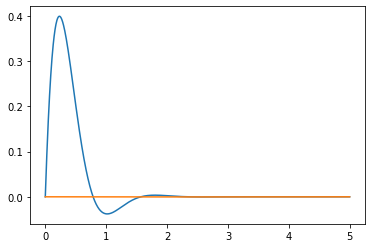

In [15]:
plot_aprox_and_inter(expsin, f_inter, 0, 5)

In [198]:
def plot_inters(f, fs_inter, nodes):
    left, right = nodes[0], nodes[-1]
    xs_range = np.linspace(left, right, 1000)
    ys_range = f(xs_range)
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
    
    axs[0].plot(xs_range, ys_range)
    axs[2].plot(xs_range, ys_range)
    for i, f_inter in enumerate(fs_inter):
        left, right = nodes[i], nodes[i + 1]
        xs_range = np.linspace(left, right, 1000)
        ys_range = f_inter(xs_range)
        axs[1].plot(xs_range, ys_range)
        axs[2].plot(xs_range, ys_range)        

<IPython.core.display.Javascript object>


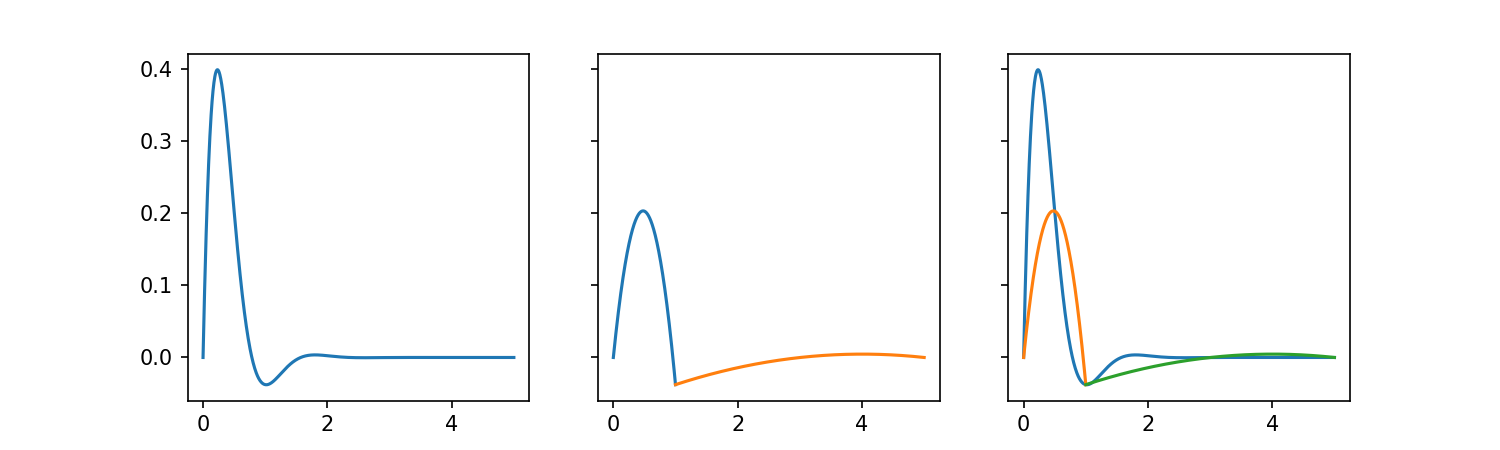

In [199]:
xs = np.linspace(0, 1, 3)
ys = expsin(xs)
f_1 = interpolate.interp1d(xs, ys, kind='quadratic')

xs = np.linspace(1, 5, 3)
ys = expsin(xs)
f_2 = interpolate.interp1d(xs, ys, kind='quadratic')
plot_inters(expsin, [f_1, f_2], [0, 1, 5])

Jest to wielomian z kotrego jest liczona analitycznie całka oznaczona w metodzie Simpsona, która ma przybliżać całkę oznaczoną zadanej funkcji.

# Zadanie 2

In [136]:
def adaptive_simpson(f, left, right, epsilon, last_value=None, intervals=[]):
    if last_value is None:
        intervals = [left]
        last_value = get_simpson(f, left, right)
    mid = (right + left) / 2
    left_value = get_simpson(f, left, mid)
    right_value = get_simpson(f, mid, right)
    if abs(left_value + right_value - last_value) < 15 * epsilon:
        intervals.append(right)
    else:
        left_value, _ = adaptive_simpson(f, left, mid, epsilon / 2, left_value, intervals)
        right_value, _ = adaptive_simpson(f, mid, right, epsilon / 2, right_value, intervals)
    return left_value + right_value, intervals

## 2 a)

In [128]:
def compare_adptive_and_classic_simpson(f, left, right, epsilon): 
    value, ints = adaptive_simpson(expsin, left, right, epsilon)
    clas_value = get_simpson(f, left, right)
    print(f'For epsilon = \t{epsilon}:\n Simpson = \t{clas_value}\n Adaptive = \t{value}\n Difference = \t{abs(clas_value - value)}.')

In [129]:
compare_adptive_and_classic_simpson(expsin, 0, 5, 1e-2)

For epsilon = 	0.01:
 Simpson = 	-0.0010027325181523321
 Adaptive = 	-0.03782275644650306
 Difference = 	0.03682002392835073.


In [130]:
compare_adptive_and_classic_simpson(expsin, 0, 5, 1e-3)

For epsilon = 	0.001:
 Simpson = 	-0.0010027325181523321
 Adaptive = 	0.16010848487812365
 Difference = 	0.16111121739627599.


In [131]:
compare_adptive_and_classic_simpson(expsin, 0, 5, 1e-4)

For epsilon = 	0.0001:
 Simpson = 	-0.0010027325181523321
 Adaptive = 	0.1600312230616263
 Difference = 	0.16103395557977862.


In [132]:
compare_adptive_and_classic_simpson(expsin, 0, 5, 1e-5)

For epsilon = 	1e-05:
 Simpson = 	-0.0010027325181523321
 Adaptive = 	0.16004511152737097
 Difference = 	0.1610478440455233.


## 2 b)

In [133]:
value, ints = adaptive_simpson(expsin, 0, 5, 1e-3)
print(ints)

[0, 5, 0, 0.3125, 0.625, 1.25, 2.5, 5, 0, 0.3125, 0.46875, 0.625, 1.25, 1.875, 2.5, 5, 0, 0.15625, 0.3125, 0.390625, 0.46875, 0.625, 0.78125, 0.9375, 1.09375, 1.25, 1.5625, 1.875, 2.1875, 2.5, 5, 0, 0.3125, 0.625, 1.25, 2.5, 5]


In [233]:
def plot_adaptive_simpson(f, left, right, epsilon): 
    value, ints = adaptive_simpson(f=expsin, left=left, right=right, epsilon=epsilon)
    print(ints)
    ints = np.array(ints)
    fs = [ interpolate.interp1d([l, (l + r) / 2, r], [f(l), f((l + r) / 2), f(r)], kind='quadratic') for (l, r) in zip(ints[:-1], ints[1:])]
    plot_inters(expsin, fs, ints)

[0, 5]


<IPython.core.display.Javascript object>


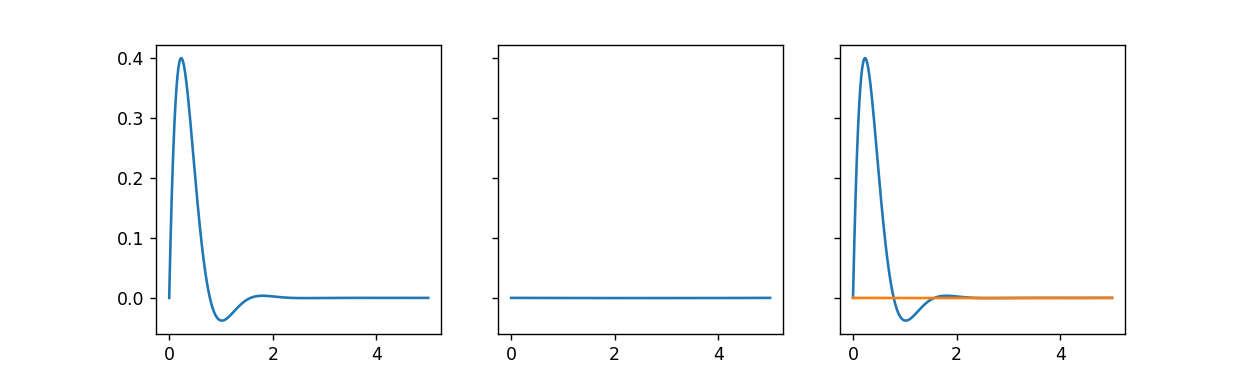

In [234]:
plot_adaptive_simpson(expsin, 0, 5, 1e-2)

[0, 0.625, 1.25, 2.5, 5]


<IPython.core.display.Javascript object>


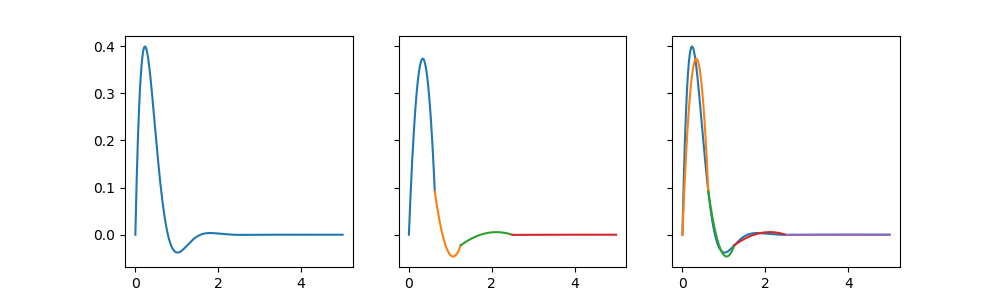

In [201]:
plot_adaptive_simpson(expsin, 0, 5, 2.2e-3)

[0, 0.3125, 0.625, 1.25, 2.5, 5]


<IPython.core.display.Javascript object>


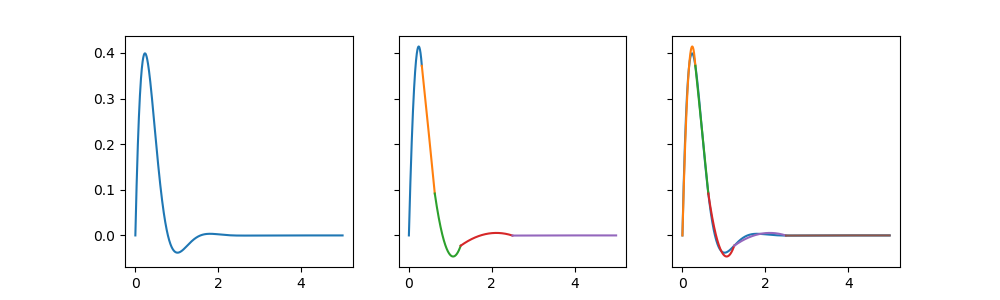

In [202]:
plot_adaptive_simpson(expsin, 0, 5, 1e-3)

[0, 0.078125, 0.15625, 0.234375, 0.3125, 0.390625, 0.46875, 0.546875, 0.625, 0.703125, 0.78125, 0.9375, 1.09375, 1.25, 1.40625, 1.5625, 1.875, 2.03125, 2.1875, 2.5, 2.8125, 3.125, 3.75, 5]


<IPython.core.display.Javascript object>


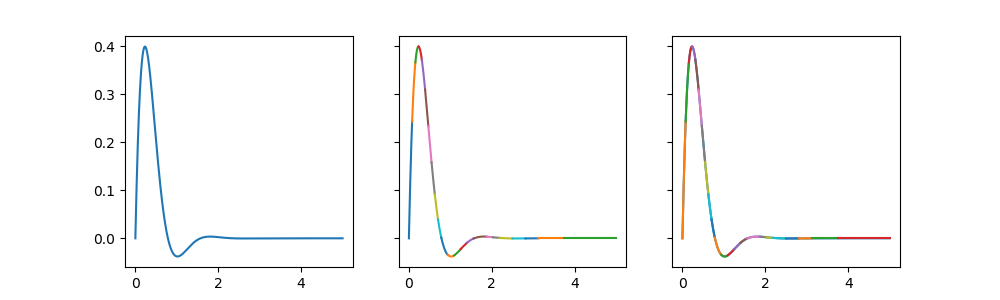

In [203]:
plot_adaptive_simpson(expsin, 0, 5, 1e-6)

# TO DO

# Zadanie 3

In [151]:
orto_polys = [np.poly1d([1]), np.poly1d([1, 0])]
def get_ortogonal(k):
    if len(orto_polys) < k:
        get_ortogonal(k-1)
    if len(orto_polys) == k:
        next_poly =  ((2 * k - 1) / k) * np.poly1d([1, 0]) * orto_polys[k-1] - (k-1)/k * orto_polys[k-2]
        orto_polys.append(next_poly)
    return orto_polys[k]

In [152]:
def plot_orto_pol(k, l=-1, r=1):
    poly = get_ortogonal(k)
    xs = np.linspace(l, r, 1000)
    ys = poly(xs)
    plt.plot(xs, ys)

## 3 a)

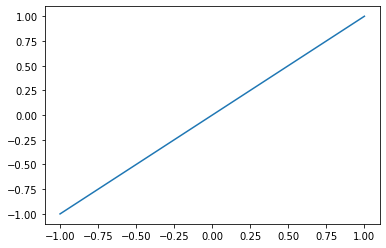

In [153]:
plot_orto_pol(1)

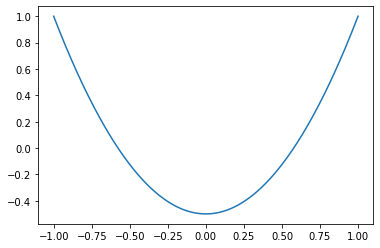

In [154]:
plot_orto_pol(2)

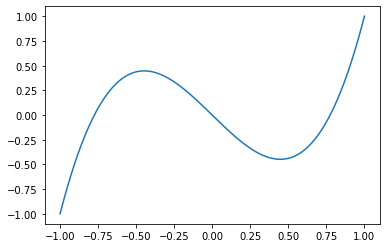

In [155]:
plot_orto_pol(3)

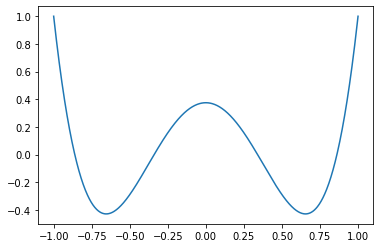

In [156]:
plot_orto_pol(4)

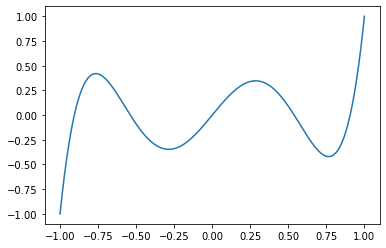

In [157]:
plot_orto_pol(5)

## 3 b)

In [166]:
def roots():
    for k in range(2, 4 + 1):
        poly = get_ortogonal(k)
        print(f'For k = {k}:')
        print(f'My roots: {sorted(poly.r)}')
        print(f'Legendre roots: {scipy.special.roots_legendre(k)[0]}\n')
roots()

For k = 2:
My roots: [-0.5773502691896258, 0.5773502691896256]
Legendre roots: [-0.57735027  0.57735027]

For k = 3:
My roots: [-0.7745966692414834, 0.0, 0.7745966692414833]
Legendre roots: [-0.77459667  0.          0.77459667]

For k = 4:
My roots: [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
Legendre roots: [-0.86113631 -0.33998104  0.33998104  0.86113631]



## 3 c)

# TO DO

# Zadanie 4

In [167]:
def apply_fun(f, *args):
    return np.array(list(map(f, *args)))

In [168]:
def get_gauss(f, k):
    nodes, weights = scipy.special.roots_legendre(k)
    return np.sum(apply_fun(f, nodes) * np.array(weights))

In [208]:
def get_monomial_diff(method, degree, l, r, *args):
    res = method(lambda x: x**degree, *args)
    prop_res = (r**(degree + 1) - l**(degree + 1)) / (degree + 1)
    return abs(res - prop_res) 

In [213]:
def get_gauss_and_monomial_diff(degree):
    return get_monomial_diff(get_gauss, degree, -1, 1, degree)

In [214]:
for k in range(1, 40 + 1):
    print(f'k = {k}, Difference = {get_gauss_and_monomial_diff(k)}.')

k = 1, Difference = 0.0.
k = 2, Difference = 0.0.
k = 3, Difference = 0.0.
k = 4, Difference = 5.551115123125783e-17.
k = 5, Difference = 0.0.
k = 6, Difference = 1.6653345369377348e-16.
k = 7, Difference = 1.3877787807814457e-17.
k = 8, Difference = 8.049116928532385e-16.
k = 9, Difference = 6.938893903907228e-18.
k = 10, Difference = 1.5543122344752192e-15.
k = 11, Difference = 0.0.
k = 12, Difference = 1.7763568394002505e-15.
k = 13, Difference = 1.3877787807814457e-17.
k = 14, Difference = 1.1102230246251565e-15.
k = 15, Difference = 0.0.
k = 16, Difference = 3.70536934468646e-15.
k = 17, Difference = 6.938893903907228e-18.
k = 18, Difference = 8.604228440844963e-16.
k = 19, Difference = 0.0.
k = 20, Difference = 1.5265566588595902e-15.
k = 21, Difference = 3.469446951953614e-18.
k = 22, Difference = 1.8735013540549517e-15.
k = 23, Difference = 3.469446951953614e-18.
k = 24, Difference = 9.298117831235686e-16.
k = 25, Difference = 1.734723475976807e-18.
k = 26, Difference = 5.13478

# TO DO

# Zadanie 5

In [230]:
def get_gauss_inter(f, k, a, b):
    g = lambda x: f((b + a) / 2 + (b - a)/ 2 * x)
    return get_gauss(g, k) * (b - a) / 2

In [231]:
def get_gauss_inter_and_monomial_diff(degree, l=-1, r=1):
    return get_monomial_diff(get_gauss_inter, degree, l , r, degree, l, r)

In [232]:
for k in range(1, 40 + 1):
    print(f'k = {k}, Difference = {get_gauss_inter_and_monomial_diff(k, 3, 7)}.')

k = 1, Difference = 0.0.
k = 2, Difference = 0.0.
k = 3, Difference = 0.0.
k = 4, Difference = 0.0.
k = 5, Difference = 3.637978807091713e-12.
k = 6, Difference = 0.0.
k = 7, Difference = 2.3283064365386963e-10.
k = 8, Difference = 1.862645149230957e-09.
k = 9, Difference = 7.450580596923828e-09.
k = 10, Difference = 4.76837158203125e-07.
k = 11, Difference = 7.152557373046875e-07.
k = 12, Difference = 2.002716064453125e-05.
k = 13, Difference = 3.814697265625e-05.
k = 14, Difference = 0.00048828125.
k = 15, Difference = 0.00048828125.
k = 16, Difference = 0.11328125.
k = 17, Difference = 0.3125.
k = 18, Difference = 0.25.
k = 19, Difference = 39.5.
k = 20, Difference = 148.0.
k = 21, Difference = 736.0.
k = 22, Difference = 10496.0.
k = 23, Difference = 17408.0.
k = 24, Difference = 155648.0.
k = 25, Difference = 4325376.0.
k = 26, Difference = 6815744.0.
k = 27, Difference = 171966464.0.
k = 28, Difference = 637534208.0.
k = 29, Difference = 11945377792.0.
k = 30, Difference = 171798

# TO DO